#### # SIIM-ISIC Melanoma Classification SoSe24

    Einleitung

Das folgende Modell soll als Teil einer Projektarbeit in Artificial Intelligence angefertigt werden. Hierbei wird die SIIM-ISIC Melanoma Classification zur Identifikation von Melanomen bearbeitet



# Import willkürlicher Libraries, weil ich keine Ahnung habe, was ich tue¶


In [9]:
import os
#os.environ['KERAS_BACKEND'] = 'tensorflow' # oder 'jax' kp really

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.contrib.concurrent import process_map
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

print('done')

done


# Nur Trainingsdaten laden und Labels kodieren


In [11]:
# Funktion zum Laden von Bildern
def load_image(image_path, target_size=(512, 512)):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(target_size)
    return np.array(image)

# Laden der Trainingsdaten
def load_data(csv_file, image_dir, max_images=None, target_size=(512, 512)):
    data = pd.read_csv(csv_file)
    if max_images is not None:
        data = data.head(max_images)

    # Auswählen der relevanten Spalten für Kodierung
    data_for_encoding = data[['sex', 'age_approx', 'anatom_site_general_challenge', 'target']]

    # Kodieren der kategorialen Variablen in numerische Werte
    label_encoders = {}
    for column in ['sex', 'age_approx', 'anatom_site_general_challenge', 'target']:
        label_encoders[column] = LabelEncoder()
        data_for_encoding[column] = label_encoders[column].fit_transform(data_for_encoding[column])

    # Extrahieren der Bildnamen
    image_names = data['image_name'].values

    image_paths = [os.path.join(image_dir, image_name + '.jpg') for image_name in image_names]
    
    num_processes = os.cpu_count() or 1
    images = process_map(load_image, image_paths, max_workers=num_processes, chunksize=10)

    labels = data_for_encoding.values

    return np.array(images), np.array(labels), image_paths, label_encoders, image_names

path_data_train = 'C:\\Users\\Kumpelbrot\\Documents\\Jupyter Notebooks\\SIIMbs\\train.csv'

path_data_train = r'C:\Users\Kumpelbrot\Documents\Jupyter Notebooks\SIIMbs\\train.csv'


# Laden der Trainingsdaten mit kodierten Labels
train_images, train_labels, train_image_paths, label_encoders, train_image_names = load_data(path_data_train, path_image_train, max_images=100)

# Aufteilen der Trainingsdaten in Trainings- und Validierungssätze
train_images, val_images, train_labels, val_labels, train_image_names, val_image_names = train_test_split(train_images, 
                                                                                                          train_labels, 
                                                                                                          train_image_names, 
                                                                                                          test_size=0.2, 
                                                                                                          random_state=42)
'''
# Funktion zum Laden der Testdaten
def load_test_data(csv_file, image_dir, max_images=None, target_size=(512, 512)):
    data = pd.read_csv(csv_file)
    if max_images is not None:
        data = data.head(max_images)

    image_paths = [os.path.join(image_dir, row['image_name'] + '.jpg') for _, row in data.iterrows()]
    num_processes = os.cpu_count() or 1
    images = process_map(load_image, image_paths, max_workers=num_processes, chunksize=10)

    return np.array(images), image_paths

# Laden der Testdaten
test_images, test_image_paths = load_test_data(path_data_test, path_image_test, max_images=100)

# Extrahieren der Bildnamen
test_image_names = [os.path.splitext(os.path.basename(path))[0] for path in test_image_paths]



#testtestestestesteststestsettteststestestsetsetestsetsetsetsesetset
print("Anzahl der Trainingsdaten:", len(train_images))
print("Anzahl der Validierungsdaten:", len(val_images))
print('\n')
print("Anzahl der geladenen Bilder:", len(train_images))
print("Anzahl der geladenen Labels:", len(train_labels))
print('\n')
print("Train Labels:", train_labels)
#print("Train Bildernamen:", image_names_train)
print("done")
'''

  0%|          | 0/100 [00:00<?, ?it/s]

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [16]:
# Kodierung für das Geschlecht
print("Kodierung der Geschlechter:")
print(label_encoders['sex'].classes_)
print()

# Kodierung für die anatomische Stelle
print("Kodierung der Alter:")
print(label_encoders['age_approx'].classes_)
print()

# Kodierung für die anatomische Stelle
print("Kodierung der anatomischen Stellen:")
print(label_encoders['anatom_site_general_challenge'].classes_)
print()

# Kodierung für das Ziel
print("Kodierung der targets:")
print(label_encoders['target'].classes_)

Kodierung für das Geschlecht:
['female' 'male' nan]

Kodierung für die anatomische Stelle:
[15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85. nan]

Kodierung für die anatomische Stelle:
['head/neck' 'lower extremity' 'oral/genital' 'palms/soles' 'torso'
 'upper extremity' nan]

Kodierung für das Ziel:
[0 1]


# Laden der Testdaten vorrübergehend verworfen

In [ ]:

'''
path_data_test = '/kaggle/input/siim-isic-melanoma-classification/test.csv'
path_image_test = '/kaggle/input/siim-isic-melanoma-classification/jpeg/test'


# Funktion zum Laden der Testdaten
def load_test_data(csv_file, image_dir, max_images=None, target_size=(512, 512)):
    data = pd.read_csv(csv_file)
    if max_images is not None:
        data = data.head(max_images)

    image_paths = [os.path.join(image_dir, row['image_name'] + '.jpg') for _, row in data.iterrows()]
    num_processes = os.cpu_count() or 1
    images = process_map(load_image, image_paths, max_workers=num_processes, chunksize=10)

    return np.array(images), image_paths

# Laden der Testdaten
test_images, test_image_paths = load_test_data(path_data_test, path_image_test, max_images=100)

# Extrahieren der Bildnamen
test_image_names = [os.path.splitext(os.path.basename(path))[0] for path in test_image_paths]
'''

# Anzeigen eines bekannten Melanom zur Überprüfung der Integrität der geladenen Daten
In geordneter Reihenfolge sind: Bild 91, 
Bild 235, 
Bild 314
Melanome

Wenn die train_and_split Methode nicht kommentiert ist, dann werden alle geladenen Daten gemischt und in Trainings- und Validierungsdaten aufteilt. Ferner muss manuell, über die tatsächlichen Bilder und Daten aus den train.csv Dateien verglichen werden, um die Synchronität, der geladenen Bilder zu überprüfen. 

Idealerweise wird im Folgenden eine solche Überprüfung durchgeführt.

116 

Das Bild 'ISIC_0232101' ist ein Melanom.


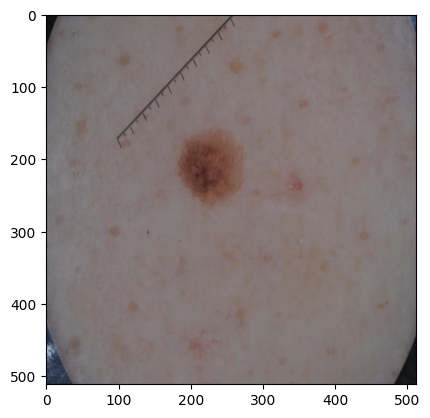

148 

Das Bild 'ISIC_0207268' ist ein Melanom.


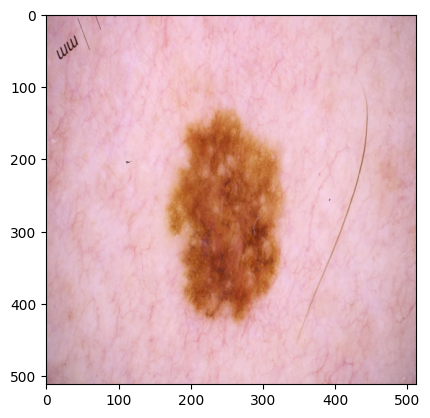

331 

Das Bild 'ISIC_0149568' ist ein Melanom.


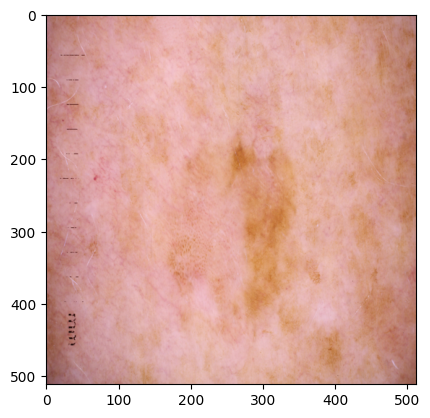

364 

Das Bild 'ISIC_0188432' ist ein Melanom.


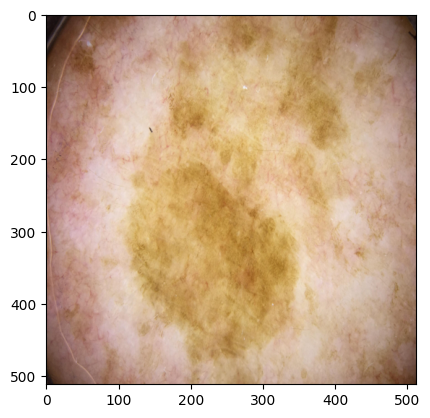

368 

Das Bild 'ISIC_0247330' ist ein Melanom.


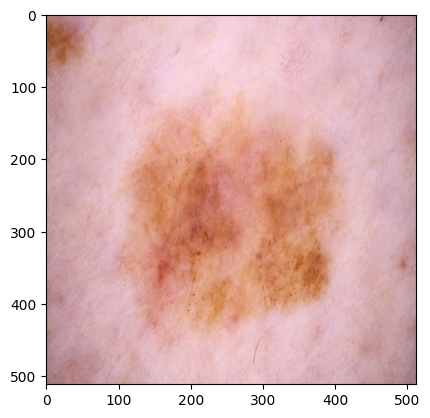

'       \nzahl = 91\nplt.figure()\nplt.imshow(train_images[zahl])\nplt.show()\n\n# Überprüfung des Target-Werts und des Bildnamens\nif train_labels[zahl][-1] == 1:\n    #print(f"Das folgende Bild \'{image_names_train[zahl]}\' ist bösartig.")\nelse:\n    #print(f"Das folgende Bild \'{image_names_train[zahl]}\' ist gutartig.") \n'

In [17]:
 
for i, label in enumerate(train_labels):
    if label[-1] == 1:
        print(i, '\n')
        print(f"Das Bild '{train_image_names[i]}' ist ein Melanom.")
        plt.figure()
        plt.imshow(train_images[i])
        plt.show()
'''       
zahl = 91
plt.figure()
plt.imshow(train_images[zahl])
plt.show()

# Überprüfung des Target-Werts und des Bildnamens
if train_labels[zahl][-1] == 1:
    #print(f"Das folgende Bild '{image_names_train[zahl]}' ist bösartig.")
else:
    #print(f"Das folgende Bild '{image_names_train[zahl]}' ist gutartig.") 
'''

Nach langwierigem manuellen Vergleich der Bildern aus dem jpeg/train Datensatz mit dem Bildnamen und den Werten, lässt sich bestätigen, das in diesem Ablauf mind. 2 der 5 angezeigten Melanome korrekt zugeordnet sind. Die anderen 3 werden nicht verglichen, da die Namen zu hoch liegen, da der Kaggle Datensatz keine Suchfunktion bietet und jede Erweiterung der Liste aus dem Datensatz nur 30 Elemente wiedergibt.

# Definierung des Models (Numpy Array kann nicht in Tensor konvertiert werden)

Das Folgende Model ist höchstwahrscheinlich Fehlerhaft und liefert zum Zeitpunkt des Trainings nur Fehlermeldungen. Nach weiterer Recherche scheint das Problem an der von Kaggle verwendeten Tensorflow bzw. Cuda Version zu liegen und der verwendbaren GPU's bzw. TPU's die Kaggle bereitstellt.

In dieser Version können Numpy Arrays nicht in Tensoren konvertiert werden. 

**Lösungsansatz 1: Labels  in Integer bzw. Float kodieren und nach dem trainieren dekodieren.**

In [18]:
# Anpassen des Modells für mehrklassige Klassifikation
num_classes = train_labels.shape[1]  # Anzahl der Klassen
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Anzahl der Klassen in der Ausgabeschicht
])

# Definiere die Anzahl der Klassen (Anzahl der Ausgabeneuronen)
num_classes = len(label_encoders['target'].classes_)  # Anzahl der Klassen aus der Kodierung der Zielvariablen



# Kompilieren des Modells
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [19]:
# Trainieren des Modells
history = model.fit(train_images, train_labels,epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 10s/step - accuracy: 0.8678 - loss: -3169087.5000 - val_accuracy: 0.9500 - val_loss: -112151720.0000
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.8837 - loss: -540061312.0000 - val_accuracy: 0.9500 - val_loss: -7222564864.0000
Epoch 3/10
 7/13 ━━━━━━━━━━━━━━━━━━━━ 1:00 10s/step - accuracy: 0.8724 - loss: -9505815552.0000

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

# Stelle Visualisierungen der Verlsute und Genauigkeit dar

In [ ]:
# Verluste
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# Genauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Genauigkeit:', test_acc)